In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pathToData = '.\\emnist\\'
img_rows = img_cols = 28

def loadBinData(pathToData, img_rows, img_cols): 
    print('Загрузка данных из двоичных файлов...') 
    with open(pathToData + 'imagesTrain.bin', 'rb') as read_binary: 
        x_train = np.fromfile(read_binary, dtype = np.uint8) 
    with open(pathToData + 'labelsTrain.bin', 'rb') as read_binary: 
        y_train = np.fromfile(read_binary, dtype = np.uint8) 
    with open(pathToData + 'imagesTest.bin', 'rb') as read_binary: 
        x_test = np.fromfile(read_binary, dtype = np.uint8) 
    with open(pathToData + 'labelsTest.bin', 'rb') as read_binary: 
        y_test = np.fromfile(read_binary, dtype = np.uint8) 

    x_train = np.array(x_train[16:], dtype = 'float32') / 255 
    x_test = np.array(x_test[16:], dtype = 'float32') / 255
    if flatten or reshape:
        x_train = x_train.reshape(-1, img_rows, img_cols)
        x_test = x_test.reshape(-1, img_rows, img_cols) 
    y_train = y_train[8:]
    y_test = y_test[8:] 
    return x_train, y_train, x_test, y_test 

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential()
#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Reshape((784,)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(	optimizer='adam', 
				loss='categorical_crossentropy', 
				metrics=['accuracy']
				)


history = model.fit(x_train, y_train_cat, epochs=10, batch_size=512)

Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 0.6498 - accuracy: 0.8373
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.2369 - accuracy: 0.9305
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1767 - accuracy: 0.9482
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1390 - accuracy: 0.9591
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1138 - accuracy: 0.9666
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0963 - accuracy: 0.9717
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0816 - accuracy: 0.9759
Epoch 8/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0718 - accuracy: 0.9790
Epoch 9/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0622 - accuracy: 0.9818
Epoch 10/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0553 - accuracy: 0.9837

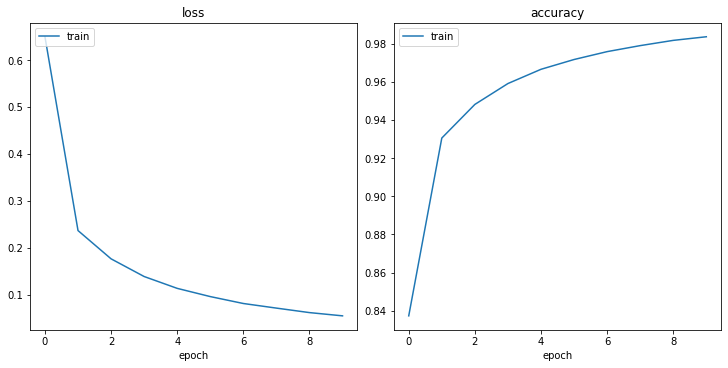

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
fig, axs = plt.subplots(nrows=1, ncols=len(history.history.keys()), constrained_layout=True, figsize=(10, 5))

for ax, key in zip(axs.flat, history.history.keys()):	
	ax.plot(history.history[key])
	ax.set_title(key)
	#ax.set_ylabel(key)
	ax.set_xlabel('epoch')
	ax.legend(['train', 'test'], loc='upper left')
plt.show()

print(model.summary())

In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test_cat)
print(val_loss, val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0970 - accuracy: 0.9716
0.09703884273767471 0.9715999960899353


7


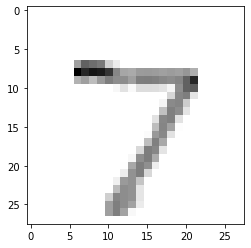

In [6]:

predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
print(predictions[0])

plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

Predicted: [8 3 4 8 3 0 3 7 3 2 5 3 2 8 8 8 1 3 4 6 8 9 2 8 9]
From Test: [3 2 9 9 9 6 9 2 5 8 6 7 8 2 2 1 2 7 8 0 5 4 7 9 8]


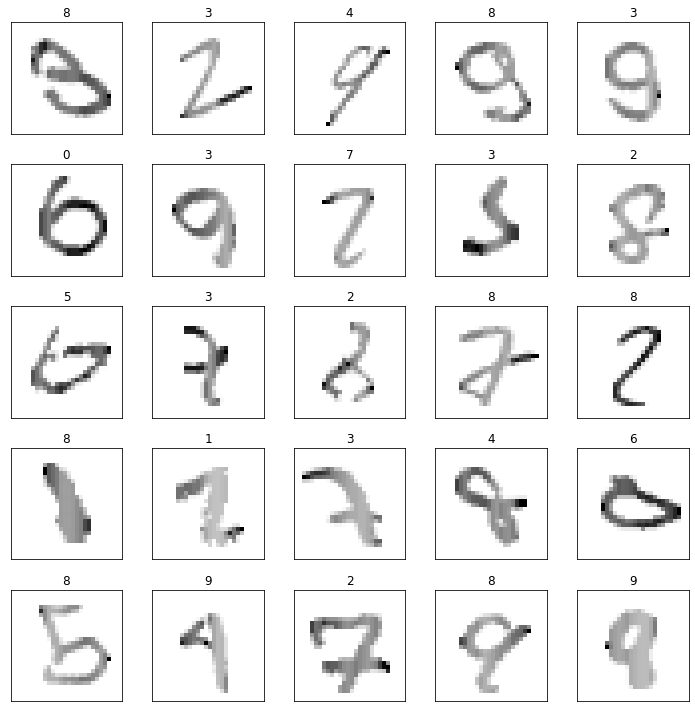

In [7]:
# Выделение неверных вариантов
mask = predictions == y_test

x_false = x_test[~mask]
pred_false = predictions[~mask]
y_false = y_test[~mask]

print("Predicted:", pred_false[:25])
print("From Test:", y_false[:25])

# Вывод первых 25 неверных результатов
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
    ax.imshow(x_false[i], cmap=plt.cm.binary)
    ax.set_title(str(pred_false[i]))
plt.tight_layout()
plt.show()

In [8]:
num_classes = 26
flatten = True
reshape = False

x_train, y_train, x_test, y_test = loadBinData(pathToData, img_rows, img_cols)

y_train -= 1
y_test -= 1

if flatten or reshape:
	x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols).transpose(0,2,1)
	x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols).transpose(0,2,1)
else:
	x_train = x_train.reshape(-1, 784)
	x_test = x_test.reshape(-1, 784)

y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

Загрузка данных из двоичных файлов...


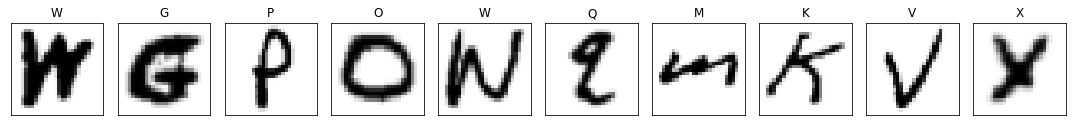

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	sample = x_train[i].reshape(img_rows, img_cols).transpose(1, 0) if not (flatten or reshape) else x_train[i]
	ax.imshow(sample, cmap=plt.cm.binary)
	ax.set_title(chr(y_train[i] + 65))
plt.tight_layout()
plt.show()

In [10]:
model = tf.keras.Sequential()
if reshape: model.add(tf.keras.layers.Reshape((784,)))
if flatten: model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))

model.compile(	optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
				loss='categorical_crossentropy', 
				metrics=['accuracy']
				)

history = model.fit(x_train, y_train_cat, epochs=10, batch_size=4096)

Epoch 1/10
31/31 [==============================] - 1s 8ms/step - loss: 1.4886 - accuracy: 0.5632
Epoch 2/10
31/31 [==============================] - 0s 8ms/step - loss: 0.6719 - accuracy: 0.7930
Epoch 3/10
31/31 [==============================] - 0s 8ms/step - loss: 0.5141 - accuracy: 0.8382
Epoch 4/10
31/31 [==============================] - 0s 9ms/step - loss: 0.4485 - accuracy: 0.8568
Epoch 5/10
31/31 [==============================] - 0s 8ms/step - loss: 0.4017 - accuracy: 0.8704
Epoch 6/10
31/31 [==============================] - 0s 8ms/step - loss: 0.3764 - accuracy: 0.8782
Epoch 7/10
31/31 [==============================] - 0s 8ms/step - loss: 0.3607 - accuracy: 0.8815
Epoch 8/10
31/31 [==============================] - 0s 8ms/step - loss: 0.3375 - accuracy: 0.8889
Epoch 9/10
31/31 [==============================] - 0s 8ms/step - loss: 0.3275 - accuracy: 0.8922
Epoch 10/10
31/31 [==============================] - 0s 7ms/step - loss: 0.3140 - accuracy: 0.8953


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test_cat)
print(val_loss, val_acc)

650/650 [==============================] - 2s 2ms/step - loss: 0.3247 - accuracy: 0.8972
0.32466527819633484 0.897163450717926


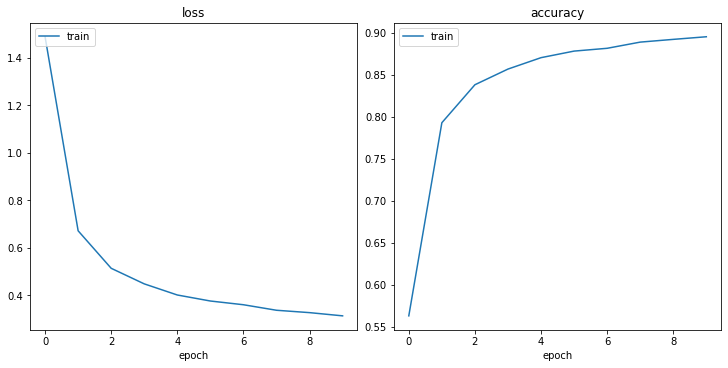

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=len(history.history.keys()), constrained_layout=True, figsize=(10, 5))

for ax, key in zip(axs.flat, history.history.keys()):	
	ax.plot(history.history[key])
	ax.set_title(key)
	#ax.set_ylabel(key)
	ax.set_xlabel('epoch')
	ax.legend(['train', 'test'], loc='upper left')

plt.show()

A


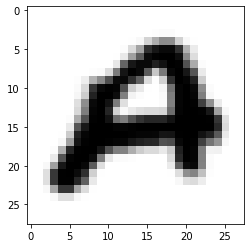

In [13]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
print(chr(predictions[5] + 65))
sample = x_test[5].reshape(img_rows, img_cols).transpose(1, 0) if not (flatten or reshape) else x_test[5]
plt.imshow(sample, cmap=plt.cm.binary)
plt.show()

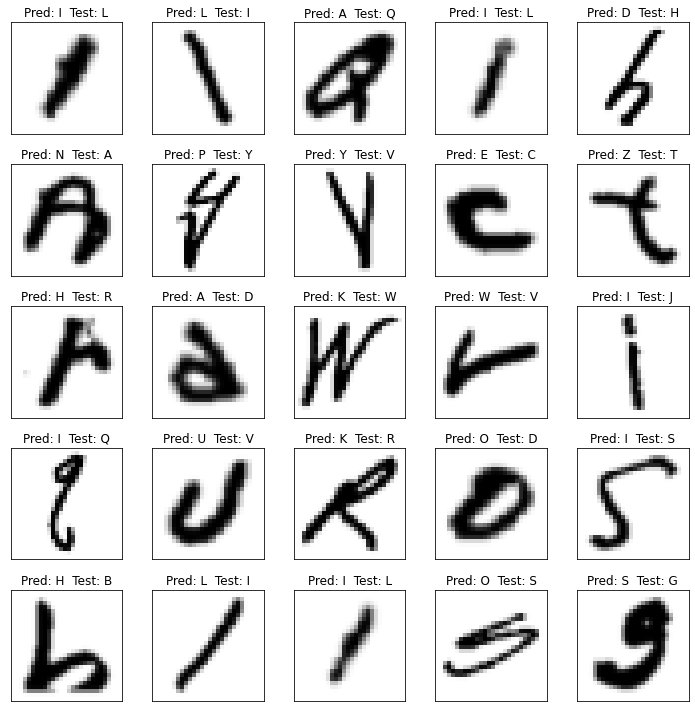

In [14]:
# Выделение неверных вариантов
mask = predictions == y_test

x_false = x_test[~mask]
pred_false = predictions[~mask]
y_false = y_test[~mask]

rs = np.random.randint(0, len(pred_false), 25)

# Вывод первых 25 неверных результатов
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
    idx = rs[i]
    sample = x_false[idx].reshape(img_rows, img_cols).transpose(1, 0) if not (flatten or reshape) else x_false[idx]
    ax.imshow(sample, cmap=plt.cm.binary)
    ax.set_title('Pred: ' + chr(pred_false[idx] + 65) + '  Test: ' + chr(y_false[idx] + 65))
plt.tight_layout()
plt.show()

In [15]:
flatten = True
reshape = False
x_train_emnist, y_train_emnist, x_test_emnist, y_test_emnist = loadBinData(pathToData, img_rows, img_cols)
y_train_emnist += 9
y_test_emnist += 9

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = np.concatenate((x_train, x_train_emnist), axis=0)
y_train = np.concatenate((y_train, y_train_emnist), axis=0)
x_test = np.concatenate((x_test, x_test_emnist), axis=0)
y_test = np.concatenate((y_test, y_test_emnist), axis=0)
num_classes = 26 + 10
print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print(x_train.shape)
print(x_test.shape)
input_shape = (img_rows, img_cols, 1)

y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

Загрузка данных из двоичных файлов...
(184800, 28, 28)
(30800, 28, 28)
(184800, 28, 28, 1)
(30800, 28, 28, 1)


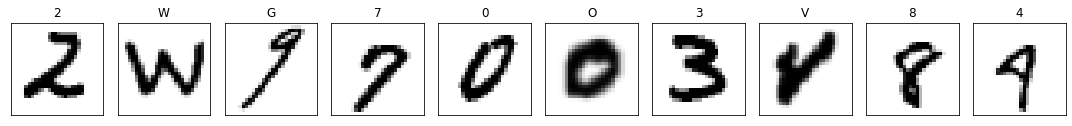

In [16]:
rs = np.random.randint(0, len(x_train), size=10)
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	idx = rs[i]
	sample = x_train[idx] if y_train[idx] < 10 else x_train[idx].transpose(1, 0, 2) 
	tch = chr(y_train[idx] + 48) if y_train[idx] < 10 else chr(y_train[idx] + 55)
	ax.imshow(sample, cmap=plt.cm.binary)  
	ax.set_title(tch)
plt.tight_layout()
plt.show()

In [17]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = input_shape))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size = (5, 5), strides = (1, 1), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(16, activation = 'linear'))

model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

model.compile(	optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
				loss='categorical_crossentropy', 
				metrics=['accuracy'],
				)

history = model.fit(x_train, y_train_cat,validation_split=0.2, epochs=25, batch_size=2048)

Epoch 1/25
73/73 [==============================] - 7s 58ms/step - loss: 5.5515 - accuracy: 0.3951 - val_loss: 3.1766 - val_accuracy: 0.1743
Epoch 2/25
73/73 [==============================] - 4s 54ms/step - loss: 1.0998 - accuracy: 0.6720 - val_loss: 2.6571 - val_accuracy: 0.4239
Epoch 3/25
73/73 [==============================] - 4s 55ms/step - loss: 0.7528 - accuracy: 0.7745 - val_loss: 1.2999 - val_accuracy: 0.6462
Epoch 4/25
73/73 [==============================] - 4s 54ms/step - loss: 0.5649 - accuracy: 0.8291 - val_loss: 0.7515 - val_accuracy: 0.7667
Epoch 5/25
73/73 [==============================] - 4s 54ms/step - loss: 0.4520 - accuracy: 0.8607 - val_loss: 0.7338 - val_accuracy: 0.7897
Epoch 6/25
73/73 [==============================] - 4s 54ms/step - loss: 0.3833 - accuracy: 0.8813 - val_loss: 0.7066 - val_accuracy: 0.7880
Epoch 7/25
73/73 [==============================] - 4s 54ms/step - loss: 0.3383 - accuracy: 0.8943 - val_loss: 0.6247 - val_accuracy: 0.8159
Epoch 8/25
73

In [18]:
val_loss, val_acc = model.evaluate(x_test, y_test_cat)
print(val_loss, val_acc)

963/963 [==============================] - 4s 4ms/step - loss: 0.2480 - accuracy: 0.9283
0.24803216755390167 0.9283117055892944


4


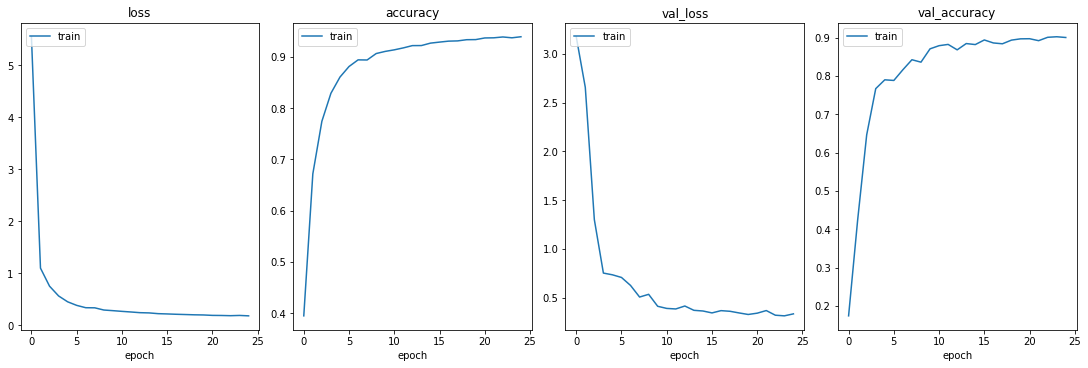

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 10, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)             

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=len(history.history.keys()), constrained_layout=True, figsize=(15, 5))

print(len(history.history.keys()))

for ax, key in zip(axs.flat, history.history.keys()):	
	ax.plot(history.history[key])
	ax.set_title(key)
	#ax.set_ylabel(key)
	ax.set_xlabel('epoch')
	ax.legend(['train', 'test'], loc='upper left')

plt.show()
print(model.summary())

In [ ]:
val_acc_list = []
for i in range(36):
	mask = y_test == i
	val_loss, val_acc = model.evaluate(x_test[mask], y_test_cat[mask])
	ch = chr(i + 48) if i < 10 else chr(i + 55)
	val_acc_list.append(val_acc)
	#print(f'{ch}: ', val_acc)

In [21]:
for i in range(36):
	ch = chr(i + 48) if i < 10 else chr(i + 55)
	print(f'{ch}: ', val_acc_list[i])

0:  0.9948979616165161
1:  0.9938325881958008
2:  0.9864341020584106
3:  0.9950494766235352
4:  0.9745417237281799
5:  0.9854260087013245
6:  0.9874739050865173
7:  0.9708171486854553
8:  0.9958932399749756
9:  0.9563924670219421
A:  0.9137499928474426
B:  0.9312499761581421
C:  0.9275000095367432
D:  0.8999999761581421
E:  0.9212499856948853
F:  0.9237499833106995
G:  0.7400000095367432
H:  0.8924999833106995
I:  0.7787500023841858
J:  0.9325000047683716
K:  0.9287499785423279
L:  0.7087500095367432
M:  0.9587500095367432
N:  0.90625
O:  0.9637500047683716
P:  0.9674999713897705
Q:  0.7587500214576721
R:  0.9212499856948853
S:  0.9549999833106995
T:  0.956250011920929
U:  0.9100000262260437
V:  0.8999999761581421
W:  0.9350000023841858
X:  0.9312499761581421
Y:  0.9275000095367432
Z:  0.9487500190734863


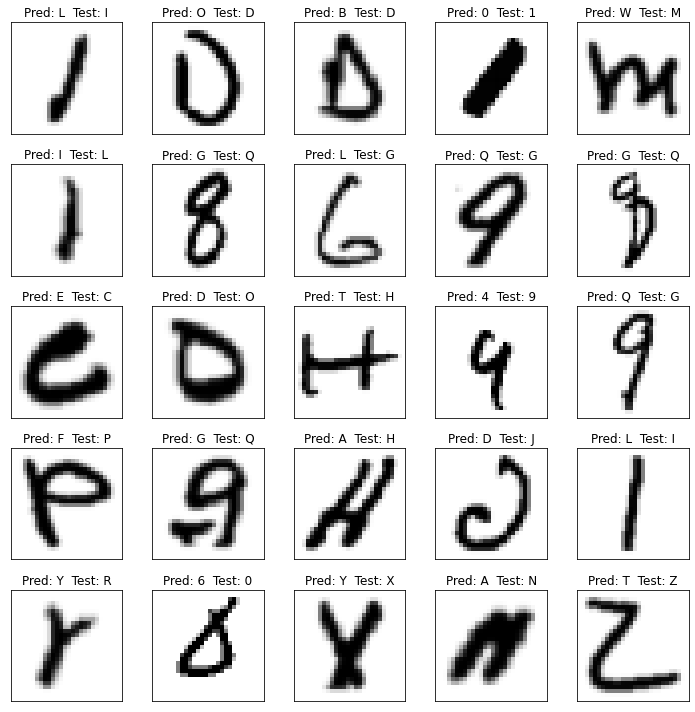

In [23]:
# Выделение неверных вариантов
show_false = True

if show_false:
    mask = predictions == y_test
    x_false = x_test[~mask]
    pred_false = predictions[~mask]
    y_false = y_test[~mask]
    rs = np.random.randint(0, len(pred_false), 25)
else:
    rs = np.random.randint(0, len(predictions), 25)

# Вывод первых 25 неверных результатов
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
    idx = rs[i]
    if show_false:
        sample = x_false[idx] if y_false[idx] < 10 else x_false[idx].transpose(1, 0, 2)   
        pch = chr(pred_false[idx] + 48) if pred_false[idx] < 10 else chr(pred_false[idx] + 55)
        tch = chr(y_false[idx] + 48) if y_false[idx] < 10 else chr(y_false[idx] + 55)
    else:
        sample = x_test[idx] if y_test[idx] < 10 else x_test[idx].transpose(1, 0, 2)   
        pch = chr(predictions[idx] + 48) if predictions[idx] < 10 else chr(predictions[idx] + 55)
        tch = chr(y_test[idx] + 48) if y_test[idx] < 10 else chr(y_test[idx] + 55)
    ax.imshow(sample, cmap=plt.cm.binary)
    ax.set_title('Pred: ' + pch + '  Test: ' + tch)
plt.tight_layout()
plt.show()

In [ ]:
## на этой модели удалось получить точность в 94%
# model = tf.keras.Sequential()

# model.add(tf.keras.layers.Conv2D(32, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = input_shape))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))
# model.add(tf.keras.layers.Conv2D(32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# model.add(tf.keras.layers.Conv2D(64, kernel_size = (5, 5), strides = (1, 1), activation = 'relu'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(1024, activation = 'relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(16, activation = 'linear'))

# model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

# model.compile(	optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
# 				loss='categorical_crossentropy', 
# 				metrics=['accuracy'],
# 				)

# history = model.fit(x_train, y_train_cat,validation_split=0.2, epochs=50, batch_size=6000)